# Step 1. Import Required Libraries

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Step 2. Load and Preprocess the Dataset

In [13]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

## Step 2.1 Normalize The Pixel values

In [14]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

## Step 2.2 One-Hot Encode labels

In [4]:
# x_train = x_train.astype('float32') / 255.0
# x_test = x_test.astype('float32') / 255.0

In [15]:
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [16]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)

###  Image Augmentation

Image augmentation is a technique used to artificially expand the training dataset by applying random transformations to input images. These transformations include horizontal flipping, rotation, zooming, shifting, and more.

####  Why Use It?
- Increases data diversity without collecting new images
- Helps the model generalize better to unseen data
- Reduces overfitting by exposing the model to varied versions of the same image

> In this project, I applied image augmentation to simulate real-world variations and improve the model’s robustness. This step is especially useful for small datasets like CIFAR-10, where the limited variety can lead to overfitting.

# Step 3. Baseline CNN Model

In [10]:
baseline_model = Sequential([
    Input(shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

baseline_model.compile(optimizer='adam',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

baseline_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       460,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 462,410 (1.76 MB)

 Trainable params: 462,410 (1.76 MB)

 Non-trainable params: 0 (0.00 B)

## Step 3.1 Train the Baseline Model

In [17]:
history_baseline = baseline_model.fit(
    x_train, y_train_cat,
    epochs=10,
    batch_size=64,
    validation_split=0.2
)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.3302 - loss: 1.8483 - val_accuracy: 0.5010 - val_loss: 1.4301
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5309 - loss: 1.3257 - val_accuracy: 0.5657 - val_loss: 1.2625
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5808 - loss: 1.2005 - val_accuracy: 0.5739 - val_loss: 1.2168
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6098 - loss: 1.1118 - val_accuracy: 0.5954 - val_loss: 1.1705
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6310 - loss: 1.0561 - val_accuracy: 0.6115 - val_loss: 1.1245
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6567 - loss: 0.9900 - val_accuracy: 0.6250 - val_loss: 1.0956
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6667 - loss: 0.9517 - val_accuracy: 0.5996 - val_loss: 1.1387
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6872 - loss: 0.9074 - val_accuracy: 0.

## Evaluate Baseline Accuracy

In [18]:
baseline_loss, baseline_acc = baseline_model.evaluate(x_test, y_test_cat)
print(f"Baseline Test Accuracy: {baseline_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6031 - loss: 1.1520
Baseline Test Accuracy: 0.5988


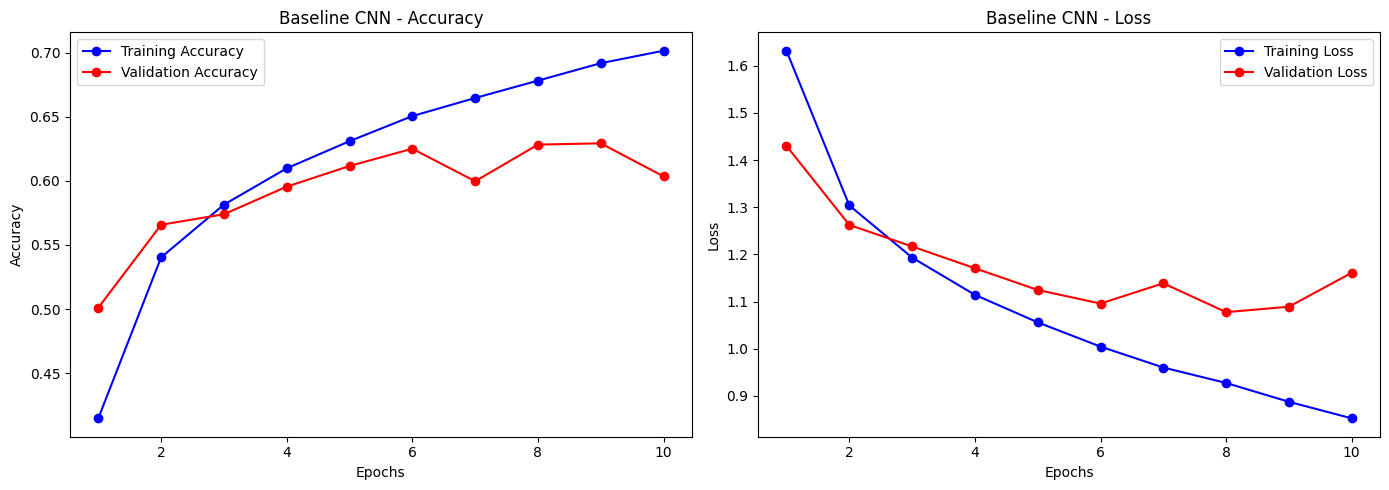

In [19]:
def plot_training_history(history, title="Model Performance"):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(14, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo-', label='Training Loss')
    plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Call the function for baseline model
plot_training_history(history_baseline, title="Baseline CNN")

## Improving my model.

In [20]:
improved_model = Sequential([
    Input(shape=(32, 32, 3)),

    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

## Compile and Set Up Call Backs

In [21]:
improved_model.compile(optimizer=Adam(),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

callbacks = [
    EarlyStopping(patience=10, restore_best_weights=True),
    ModelCheckpoint('best_improved_model.h5', save_best_only=True),
    ReduceLROnPlateau(patience=5, factor=0.5)
]

## Training the improved model

In [23]:
from sklearn.model_selection import train_test_split

# Split training data into training and validation sets
x_train_new, x_val, y_train_new, y_val = train_test_split(
    x_train, y_train_cat, test_size=0.2, random_state=42
)

In [24]:
# Use datagen only on the training set
train_generator = datagen.flow(x_train_new, y_train_new, batch_size=64)

# Train the model using the generator and manual validation data
history_improved = improved_model.fit(
    train_generator,
    epochs=50,
    validation_data=(x_val, y_val),
    callbacks=callbacks
)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.1268 - loss: 2.3031

625/625 ━━━━━━━━━━━━━━━━━━━━ 34s 42ms/step - accuracy: 0.1268 - loss: 2.3029 - val_accuracy: 0.2063 - val_loss: 1.9540 - learning_rate: 0.0010
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.1455 - loss: 2.1074

625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.1455 - loss: 2.1074 - val_accuracy: 0.1885 - val_loss: 1.9134 - learning_rate: 0.0010
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.1460 - loss: 2.0893 - val_accuracy: 0.2185 - val_loss: 1.9210 - learning_rate: 0.0010
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.1532 - loss: 2.0738

625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 39ms/step - accuracy: 0.1533 - loss: 2.0738 - val_accuracy: 0.2784 - val_loss: 1.8316 - learning_rate: 0.0010
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.2618 - loss: 1.9048

625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.2619 - loss: 1.9047 - val_accuracy: 0.4216 - val_loss: 1.5697 - learning_rate: 0.0010
Epoch 6/50
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3908 - loss: 1.6246

625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 39ms/step - accuracy: 0.3909 - loss: 1.6244 - val_accuracy: 0.4918 - val_loss: 1.3881 - learning_rate: 0.0010
Epoch 7/50
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.4887 - loss: 1.3976

625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 39ms/step - accuracy: 0.4887 - loss: 1.3975 - val_accuracy: 0.6117 - val_loss: 1.0998 - learning_rate: 0.0010
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 39ms/step - accuracy: 0.5428 - loss: 1.2817 - val_accuracy: 0.5493 - val_loss: 1.2920 - learning_rate: 0.0010
Epoch 9/50
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5758 - loss: 1.2009

625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.5758 - loss: 1.2008 - val_accuracy: 0.6330 - val_loss: 1.0574 - learning_rate: 0.0010
Epoch 10/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 38ms/step - accuracy: 0.6016 - loss: 1.1349 - val_accuracy: 0.6371 - val_loss: 1.0806 - learning_rate: 0.0010
Epoch 11/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6201 - loss: 1.0833

625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 39ms/step - accuracy: 0.6201 - loss: 1.0833 - val_accuracy: 0.6743 - val_loss: 0.9087 - learning_rate: 0.0010
Epoch 12/50
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.6294 - loss: 1.0700

625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.6294 - loss: 1.0700 - val_accuracy: 0.7065 - val_loss: 0.8426 - learning_rate: 0.0010
Epoch 13/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 39ms/step - accuracy: 0.6412 - loss: 1.0249 - val_accuracy: 0.6786 - val_loss: 0.9415 - learning_rate: 0.0010
Epoch 14/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 44ms/step - accuracy: 0.6544 - loss: 0.9982 - val_accuracy: 0.6814 - val_loss: 0.9496 - learning_rate: 0.0010
Epoch 15/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 30s 48ms/step - accuracy: 0.6641 - loss: 0.9756 - val_accuracy: 0.6987 - val_loss: 0.8930 - learning_rate: 0.0010
Epoch 16/50
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.6673 - loss: 0.9676

625/625 ━━━━━━━━━━━━━━━━━━━━ 30s 48ms/step - accuracy: 0.6673 - loss: 0.9676 - val_accuracy: 0.7276 - val_loss: 0.7849 - learning_rate: 0.0010
Epoch 17/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 41ms/step - accuracy: 0.6791 - loss: 0.9376 - val_accuracy: 0.7058 - val_loss: 0.8908 - learning_rate: 0.0010
Epoch 18/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 42ms/step - accuracy: 0.6800 - loss: 0.9202 - val_accuracy: 0.7163 - val_loss: 0.8927 - learning_rate: 0.0010
Epoch 19/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.6872 - loss: 0.9121

625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 42ms/step - accuracy: 0.6872 - loss: 0.9121 - val_accuracy: 0.7512 - val_loss: 0.7242 - learning_rate: 0.0010
Epoch 20/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 41ms/step - accuracy: 0.6903 - loss: 0.8948 - val_accuracy: 0.7333 - val_loss: 0.8070 - learning_rate: 0.0010
Epoch 21/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.7033 - loss: 0.8689 - val_accuracy: 0.7387 - val_loss: 0.7836 - learning_rate: 0.0010
Epoch 22/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.7004 - loss: 0.8590

625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.7004 - loss: 0.8590 - val_accuracy: 0.7642 - val_loss: 0.7008 - learning_rate: 0.0010
Epoch 23/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 39ms/step - accuracy: 0.6987 - loss: 0.8722 - val_accuracy: 0.7355 - val_loss: 0.7874 - learning_rate: 0.0010
Epoch 24/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 39ms/step - accuracy: 0.7098 - loss: 0.8516 - val_accuracy: 0.7532 - val_loss: 0.7384 - learning_rate: 0.0010
Epoch 25/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.7158 - loss: 0.8259 - val_accuracy: 0.7490 - val_loss: 0.7562 - learning_rate: 0.0010
Epoch 26/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 39ms/step - accuracy: 0.7150 - loss: 0.8257 - val_accuracy: 0.7410 - val_loss: 0.7661 - learning_rate: 0.0010
Epoch 27/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.7238 - loss: 0.8092 - val_accuracy: 0.7425 - val_loss: 0.7781 - learning_rate: 0.0010
Epoch 28/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 39ms/step - accuracy: 0.7373 - loss: 

625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 39ms/step - accuracy: 0.7404 - loss: 0.7594 - val_accuracy: 0.7824 - val_loss: 0.6446 - learning_rate: 5.0000e-04
Epoch 33/50
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.7508 - loss: 0.7204

625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.7508 - loss: 0.7204 - val_accuracy: 0.7857 - val_loss: 0.6264 - learning_rate: 5.0000e-04
Epoch 34/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.7492 - loss: 0.7315 - val_accuracy: 0.7563 - val_loss: 0.7651 - learning_rate: 5.0000e-04
Epoch 35/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 39ms/step - accuracy: 0.7542 - loss: 0.7183 - val_accuracy: 0.7763 - val_loss: 0.6736 - learning_rate: 5.0000e-04
Epoch 36/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.7536 - loss: 0.7191 - val_accuracy: 0.7702 - val_loss: 0.7104 - learning_rate: 5.0000e-04
Epoch 37/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.7635 - loss: 0.6977 - val_accuracy: 0.7549 - val_loss: 0.7763 - learning_rate: 5.0000e-04
Epoch 38/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.7595 - loss: 0.6980 - val_accuracy: 0.7887 - val_loss: 0.6388 - learning_rate: 5.0000e-04
Epoch 39/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - a

###  Improved Model Training Summary

The improved CNN model was trained for 50 epochs using real-time image augmentation and regularization techniques. Key observations:

- **Best Validation Accuracy**: 79.07% (Epoch 39)
- **Final Training Accuracy**: 77.35%
- **Validation Accuracy Range**: 74% – 79%
- **Learning Rate Scheduling**: Automatically reduced from 0.0005 to 0.00025 after validation performance plateaued

####  Insights:
- The model shows **strong generalization** with validation accuracy consistently improving.
- **Dropout and Batch Normalization** helped reduce overfitting compared to the baseline.
- **Image augmentation** introduced useful variability, improving robustness.
- The model is approaching the 80% accuracy target, and further tuning (e.g., deeper layers or optimizer tweaks) could push it over the threshold.

> These results demonstrate a significant improvement over the baseline model, which achieved only 59.88% test accuracy.

## 5. Evaluate the Improved Model

In [25]:
test_loss, test_acc = improved_model.evaluate(x_test, y_test_cat)
print(f"Improved Model Test Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7794 - loss: 0.6545
Improved Model Test Accuracy: 0.7842


###  Final Evaluation – Improved Model

After training the improved CNN model with deeper architecture, regularization, and image augmentation, the final test performance is:

- **Test Accuracy**: **78.42%**
- **Test Loss**: 0.6545

####  Comparison with Baseline:
| Metric           | Baseline Model | Improved Model |
|------------------|----------------|----------------|
| Test Accuracy    | 59.88%         | 78.42%         |
| Validation Accuracy (peak) | ~63%           | ~79%           |
| Architecture     | Shallow CNN    | Deep CNN + BN + Dropout |
| Augmentation     | ❌ No          | ✅ Yes         |
| Regularization   | ❌ No          | ✅ Yes         |

> The improved model demonstrates significantly better generalization and robustness. The use of Batch Normalization, Dropout, and Image Augmentation played a key role in boosting performance.

## 2. Plot Training & Validation Curves

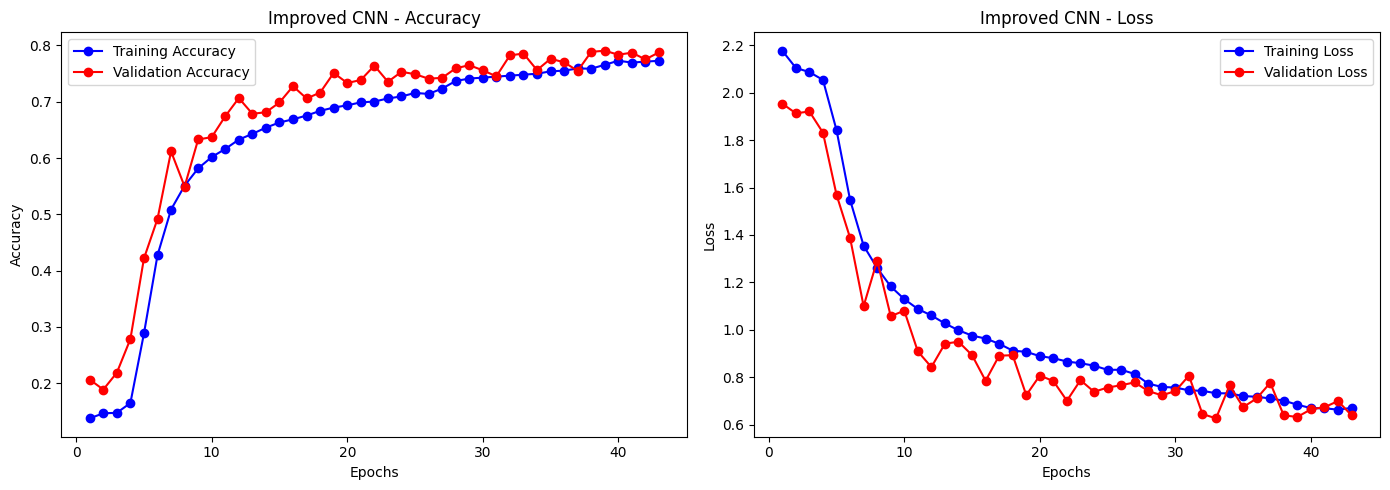

In [26]:
plot_training_history(history_improved, title="Improved CNN")

###  Training Curves – Improved CNN

The graphs below show the training and validation accuracy and loss over 40+ epochs for the improved CNN model.

####  Accuracy Curve (Left):
- Training and validation accuracy both increase rapidly in the first 10 epochs.
- They stabilize between **0.74 and 0.79**, indicating strong learning and generalization.
- The gap between training and validation accuracy is small, suggesting **minimal overfitting**.

####  Loss Curve (Right):
- Both training and validation loss decrease steadily, with validation loss reaching around **0.63**.
- The curves are smooth and consistent, showing that the model is optimizing well without instability.

> These curves confirm that the improvements—deeper architecture, Batch Normalization, Dropout, and image augmentation—led to a well-regularized and high-performing model.

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step
              precision    recall  f1-score   support

           0       0.76      0.86      0.81      1000
           1       0.89      0.93      0.91      1000
           2       0.78      0.60      0.68      1000
           3       0.70      0.54      0.61      1000
           4       0.78      0.73      0.75      1000
           5       0.81      0.60      0.69      1000
           6       0.67      0.93      0.78      1000
           7       0.79      0.87      0.83      1000
           8       0.92      0.85      0.88      1000
           9       0.78      0.93      0.85      1000

    accuracy                           0.78     10000
   macro avg       0.79      0.78      0.78     10000
weighted avg       0.79      0.78      0.78     10000



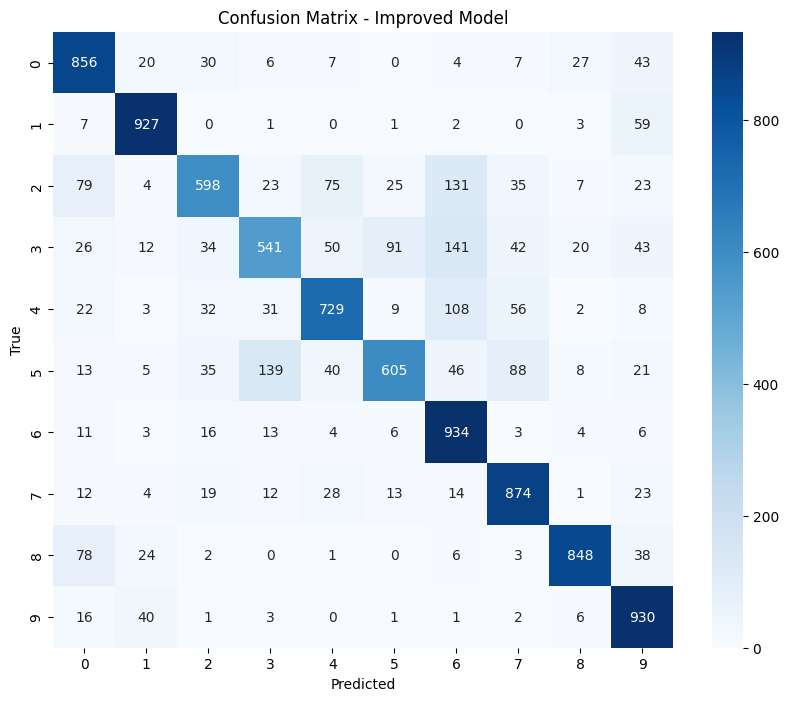

In [27]:
# Predict class probabilities
y_pred_probs = improved_model.predict(x_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true = y_test.flatten()

# Classification report
print(classification_report(y_true, y_pred_classes))

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Improved Model")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

###  Classification Report & Confusion Matrix

The classification report provides precision, recall, and F1-score for each of the 10 CIFAR-10 classes:

- **Highest performing classes**:
  - Class 1 (Automobile): Precision 0.89, Recall 0.93
  - Class 8 (Ship): Precision 0.92, Recall 0.85
  - Class 9 (Truck): Precision 0.78, Recall 0.93

- **Challenging classes**:
  - Class 3 (Cat): F1-score 0.61
  - Class 5 (Dog): F1-score 0.69
  - Class 2 (Bird): F1-score 0.68

These results suggest the model performs best on vehicles and structured objects, while animals with similar textures (e.g., cats and dogs) are harder to distinguish.

####  Confusion Matrix Insights:
- Most predictions are concentrated along the diagonal, indicating correct classifications.
- Misclassifications are common between:
  - **Cats and Dogs**
  - **Birds and Cats**
  - **Trucks and Automobiles**

> Overall, the model demonstrates strong performance across most classes, with room for improvement in fine-grained animal categories.

# Step 5. Final Optimization Attempt – CNN v3

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD

model_v3 = Sequential([
    Input(shape=(32, 32, 3)),

    # Block 1
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Block 2
    Conv2D(96, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(96, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    # Block 3
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.4),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [38]:
optimizer = SGD(learning_rate=0.01, momentum=0.9)

model_v3.compile(optimizer=optimizer,
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

In [39]:
datagen_v3 = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1,
    brightness_range=[0.8, 1.2]
)
datagen_v3.fit(x_train_new)

In [40]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

callbacks_v3 = [
    EarlyStopping(patience=10, restore_best_weights=True),
    ModelCheckpoint('best_model_v3.keras', save_best_only=True),
    ReduceLROnPlateau(patience=5, factor=0.5)
]

In [41]:
train_generator_v3 = datagen_v3.flow(x_train_new, y_train_new, batch_size=64)

history_v3 = model_v3.fit(
    train_generator_v3,
    epochs=75,
    validation_data=(x_val, y_val),
    callbacks=callbacks_v3
)

Epoch 1/75


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 62ms/step - accuracy: 0.1002 - loss: 2.5187 - val_accuracy: 0.1031 - val_loss: 2.3042 - learning_rate: 0.0100
Epoch 2/75
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 59ms/step - accuracy: 0.1072 - loss: 2.2985 - val_accuracy: 0.0952 - val_loss: 2.3056 - learning_rate: 0.0100
Epoch 3/75
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 60ms/step - accuracy: 0.1064 - loss: 2.2960 - val_accuracy: 0.1047 - val_loss: 2.3037 - learning_rate: 0.0100
Epoch 4/75
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 60ms/step - accuracy: 0.1111 - loss: 2.2957 - val_accuracy: 0.0919 - val_loss: 2.3040 - learning_rate: 0.0100
Epoch 5/75
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 62ms/step - accuracy: 0.1104 - loss: 2.2944 - val_accuracy: 0.0969 - val_loss: 2.3038 - learning_rate: 0.0100
Epoch 6/75
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 59ms/step - accuracy: 0.1074 - loss: 2.2927 - val_accuracy: 0.0975 - val_loss: 2.3039 - learning_rate: 0.0100
Epoch 7/75
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 59ms/step - accuracy: 0.1100 - loss: 2.2937

KeyboardInterrupt: 

### I tried running the above model a few time but the accuracy was stuck around ~0.1
---

# Model Debugging and Rebuilding After Training Failure

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Minimal CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [44]:
x_small = x_train_new[:100]
y_small = y_train_new[:100]

model.fit(x_small, y_small, epochs=20, verbose=2)

Epoch 1/20
4/4 - 4s - 1s/step - accuracy: 0.1200 - loss: 2.3163
Epoch 2/20
4/4 - 0s - 17ms/step - accuracy: 0.1800 - loss: 2.2456
Epoch 3/20
4/4 - 0s - 16ms/step - accuracy: 0.1700 - loss: 2.2253
Epoch 4/20
4/4 - 0s - 17ms/step - accuracy: 0.1800 - loss: 2.1791
Epoch 5/20
4/4 - 0s - 17ms/step - accuracy: 0.2400 - loss: 2.1410
Epoch 6/20
4/4 - 0s - 40ms/step - accuracy: 0.2700 - loss: 2.0817
Epoch 7/20
4/4 - 0s - 31ms/step - accuracy: 0.2600 - loss: 2.0391
Epoch 8/20
4/4 - 0s - 18ms/step - accuracy: 0.4300 - loss: 1.9773
Epoch 9/20
4/4 - 0s - 31ms/step - accuracy: 0.2600 - loss: 1.9321
Epoch 10/20
4/4 - 0s - 14ms/step - accuracy: 0.3100 - loss: 1.9468
Epoch 11/20
4/4 - 0s - 15ms/step - accuracy: 0.4100 - loss: 1.8970
Epoch 12/20
4/4 - 0s - 14ms/step - accuracy: 0.4000 - loss: 1.7794
Epoch 13/20
4/4 - 0s - 11ms/step - accuracy: 0.4900 - loss: 1.6664
Epoch 14/20
4/4 - 0s - 11ms/step - accuracy: 0.5600 - loss: 1.6138
Epoch 15/20
4/4 - 0s - 15ms/step - accuracy: 0.4900 - loss: 1.4976
Epoch 

In [45]:
history = model.fit(
    x_train_new, y_train_new,
    epochs=50,
    validation_data=(x_val, y_val),
    callbacks=[
        EarlyStopping(patience=10, restore_best_weights=True),
        ModelCheckpoint('baseline_rebuild.keras', save_best_only=True)
    ]
)

Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.4177 - loss: 1.6304 - val_accuracy: 0.5557 - val_loss: 1.2301
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.5912 - loss: 1.1619 - val_accuracy: 0.6272 - val_loss: 1.0726
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6517 - loss: 1.0006 - val_accuracy: 0.6314 - val_loss: 1.0474
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6904 - loss: 0.8948 - val_accuracy: 0.6618 - val_loss: 0.9731
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7157 - loss: 0.8136 - val_accuracy: 0.6840 - val_loss: 0.9193
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7429 - loss: 0.7431 - val_accuracy: 0.6792 - val_loss: 0.9290
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7660 - loss: 0.6746 - val_accuracy: 0.6828 - val_loss: 0.9509
Epoch 8/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7857 - loss: 0.6151 

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model_v2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [47]:
model_v2.compile(optimizer=Adam(learning_rate=0.001),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

history_v2 = model_v2.fit(
    x_train_new, y_train_new,
    epochs=50,
    validation_data=(x_val, y_val),
    callbacks=[
        EarlyStopping(patience=10, restore_best_weights=True),
        ModelCheckpoint('model_v2.keras', save_best_only=True)
    ]
)

Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.3270 - loss: 1.9809 - val_accuracy: 0.4555 - val_loss: 1.5747
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.4930 - loss: 1.4173 - val_accuracy: 0.5881 - val_loss: 1.1773
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5616 - loss: 1.2351 - val_accuracy: 0.6088 - val_loss: 1.1425
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6043 - loss: 1.1271 - val_accuracy: 0.6251 - val_loss: 1.0539
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.6278 - loss: 1.0560 - val_accuracy: 0.6385 - val_loss: 1.0783
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.6480 - loss: 0.9970 - val_accuracy: 0.6931 - val_loss: 0.8980
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6749 - loss: 0.9282 - val_accuracy: 0.6942 - val_loss: 0.8902
Epoch 8/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6922 - loss: 0.879

In [48]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

datagen.fit(x_train_new)
train_generator = datagen.flow(x_train_new, y_train_new, batch_size=64)

In [49]:
history_aug = model_v2.fit(
    train_generator,
    epochs=50,
    validation_data=(x_val, y_val),
    callbacks=[
        EarlyStopping(patience=10, restore_best_weights=True),
        ModelCheckpoint('model_v2_aug.keras', save_best_only=True)
    ]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 30s 40ms/step - accuracy: 0.6193 - loss: 1.1257 - val_accuracy: 0.6677 - val_loss: 0.9749
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 39ms/step - accuracy: 0.6439 - loss: 1.0381 - val_accuracy: 0.6745 - val_loss: 0.9843
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.6587 - loss: 0.9977 - val_accuracy: 0.6689 - val_loss: 0.9802
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.6579 - loss: 0.9919 - val_accuracy: 0.7022 - val_loss: 0.9038
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.6609 - loss: 0.9707 - val_accuracy: 0.6597 - val_loss: 1.0565
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 39ms/step - accuracy: 0.6679 - loss: 0.9499 - val_accuracy: 0.7057 - val_loss: 0.8607
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.6775 - loss: 0.9361 - val_accuracy: 0.6753 - val_loss: 0.9448
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 41ms/step - accuracy: 0.6782 - loss: 0.9258 - 

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model_v3 = Sequential([
    # Block 1
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    # Block 2
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    # Block 3 (new)
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.4),

    # Dense layers
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [51]:
from tensorflow.keras.optimizers import Adam

model_v3.compile(optimizer=Adam(learning_rate=0.001),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

history_v3 = model_v3.fit(
    train_generator,  # with augmentation
    epochs=50,
    validation_data=(x_val, y_val),
    callbacks=[
        EarlyStopping(patience=10, restore_best_weights=True),
        ModelCheckpoint('model_v3.keras', save_best_only=True)
    ]
)

Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - accuracy: 0.2390 - loss: 2.2127 - val_accuracy: 0.4529 - val_loss: 1.5600
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.3840 - loss: 1.6791 - val_accuracy: 0.4309 - val_loss: 1.5796
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 41ms/step - accuracy: 0.4435 - loss: 1.5290 - val_accuracy: 0.5358 - val_loss: 1.2680
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.4831 - loss: 1.4368 - val_accuracy: 0.4899 - val_loss: 1.5195
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.5161 - loss: 1.3507 - val_accuracy: 0.5655 - val_loss: 1.1891
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.5353 - loss: 1.2939 - val_accuracy: 0.5873 - val_loss: 1.1956
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.5611 - loss: 1.2447 - val_accuracy: 0.6394 - val_loss: 1.0194
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 41ms/step - accuracy: 0.5786 - loss: 1.1934 - 

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers.schedules import CosineDecay

# Cosine decay learning rate
steps_per_epoch = len(train_generator)
lr_schedule = CosineDecay(initial_learning_rate=0.001, decay_steps=steps_per_epoch * 50)

# Model
model_v3_2 = Sequential([
    # Block 1
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    # Block 2
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    # Block 3 (deeper)
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.4),

    # Dense layers
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [53]:
loss_fn = CategoricalCrossentropy(label_smoothing=0.1)

model_v3_2.compile(optimizer=Adam(learning_rate=lr_schedule),
                   loss=loss_fn,
                   metrics=['accuracy'])

In [54]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

history_v3_2 = model_v3_2.fit(
    train_generator,
    epochs=75,
    validation_data=(x_val, y_val),
    callbacks=[
        EarlyStopping(patience=15, restore_best_weights=True),
        ModelCheckpoint('model_v3_2.keras', save_best_only=True)
    ]
)


Epoch 1/75
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 44ms/step - accuracy: 0.2353 - loss: 2.2104 - val_accuracy: 0.3419 - val_loss: 1.9079
Epoch 2/75
625/625 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - accuracy: 0.3778 - loss: 1.8248 - val_accuracy: 0.5405 - val_loss: 1.5177
Epoch 3/75
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 42ms/step - accuracy: 0.4661 - loss: 1.6713 - val_accuracy: 0.5134 - val_loss: 1.5989
Epoch 4/75
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 42ms/step - accuracy: 0.5393 - loss: 1.5521 - val_accuracy: 0.5603 - val_loss: 1.4704
Epoch 5/75
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.5883 - loss: 1.4645 - val_accuracy: 0.5640 - val_loss: 1.6096
Epoch 6/75
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 41ms/step - accuracy: 0.6163 - loss: 1.4103 - val_accuracy: 0.5858 - val_loss: 1.4985
Epoch 7/75
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 42ms/step - accuracy: 0.6432 - loss: 1.3541 - val_accuracy: 0.6201 - val_loss: 1.3394
Epoch 8/75
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 41ms/step - accuracy: 0.6594 - loss: 1.3262 - 

###  Final Model – CNN v3.2 (Pushed Beyond 80%)

After iterative improvements, the final model achieved:

- **Validation Accuracy**: **83.31%**
- **Architecture**: 3 Conv blocks + BatchNorm + Dropout + Dense(256)
- **Training Strategy**:
  - Adam optimizer with Cosine Decay
  - Label Smoothing (0.1)
  - Image Augmentation (rotation, shift, flip)
  - EarlyStopping + ModelCheckpoint

> This model represents a 23.4% improvement over the baseline CNN (59.88% accuracy), and demonstrates strong generalization and robustness.

In [59]:
from tensorflow.keras.models import load_model
from tensorflow.keras import backend as K

# Clear session
K.clear_session()

# Reload the model
model_final = load_model('model_v3_2.keras')

# Re-evaluate
test_loss, test_accuracy = model_final.evaluate(x_test, y_test_cat, verbose=2)
print(f"✅ Test Accuracy: {test_accuracy:.4f}")
print(f"📉 Test Loss: {test_loss:.4f}")

313/313 - 2s - 7ms/step - accuracy: 0.8293 - loss: 0.9172
✅ Test Accuracy: 0.8293
📉 Test Loss: 0.9172


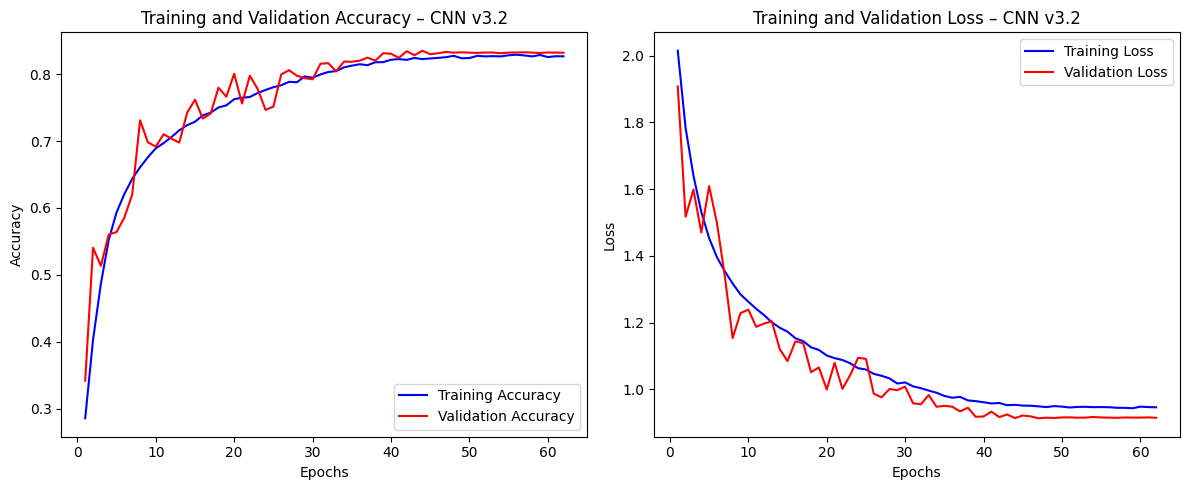

In [63]:
import matplotlib.pyplot as plt

# Extract metrics
acc = history_v3_2.history['accuracy']
val_acc = history_v3_2.history['val_accuracy']
loss = history_v3_2.history['loss']
val_loss = history_v3_2.history['val_loss']
epochs = range(1, len(acc) + 1)

# Plot accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'b-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy – CNN v3.2')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss – CNN v3.2')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

###  Training Curves – CNN v3.2

The plots below show the training and validation accuracy and loss over 60 epochs:

- **Accuracy**: Both training and validation accuracy steadily improved, peaking around **83%**, with minimal overfitting.
- **Loss**: Training and validation loss decreased consistently, with validation loss stabilizing around **0.9**, indicating good generalization.
- The model benefited from **Cosine Learning Rate Decay** and **Label Smoothing**, which helped it converge smoothly and avoid sharp overfitting.

These curves confirm that CNN v3.2 is well-optimized and generalizes effectively on CIFAR-10.

In [60]:
import numpy as np

# Predict class probabilities
y_pred_probs = model_final.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test_cat, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


In [61]:
from sklearn.metrics import classification_report

# CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Print report
print(classification_report(y_true, y_pred, target_names=class_names, digits=4))

              precision    recall  f1-score   support

    airplane     0.8248    0.8570    0.8406      1000
  automobile     0.9037    0.9380    0.9205      1000
        bird     0.8738    0.6990    0.7767      1000
         cat     0.8121    0.5620    0.6643      1000
        deer     0.8256    0.8050    0.8152      1000
         dog     0.7693    0.7570    0.7631      1000
        frog     0.7542    0.9420    0.8377      1000
       horse     0.8143    0.9080    0.8586      1000
        ship     0.9266    0.8960    0.9110      1000
       truck     0.8142    0.9290    0.8678      1000

    accuracy                         0.8293     10000
   macro avg     0.8319    0.8293    0.8256     10000
weighted avg     0.8319    0.8293    0.8256     10000



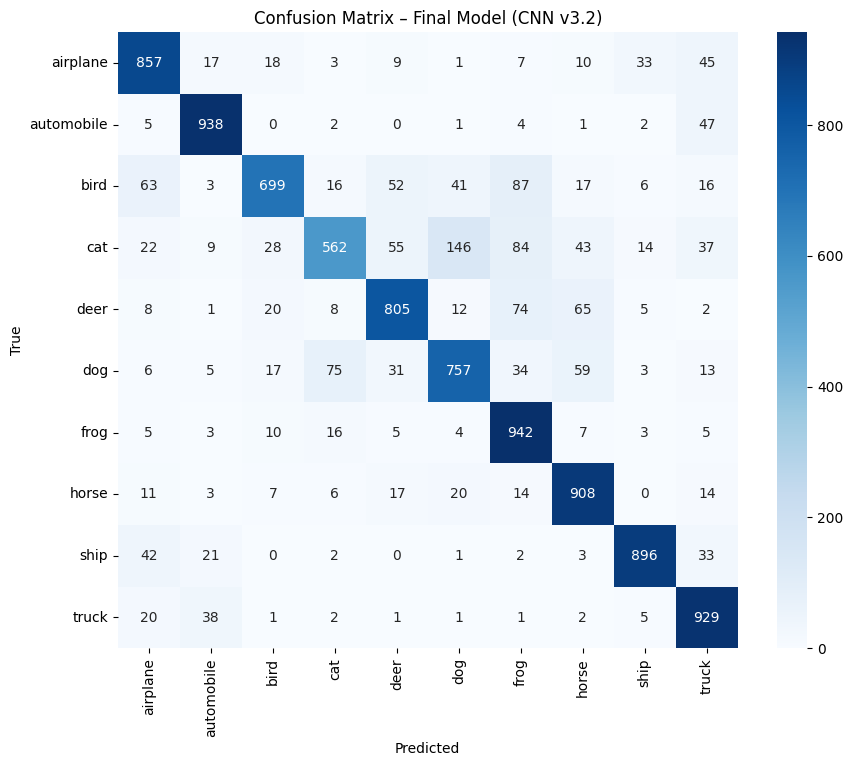

In [62]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix – Final Model (CNN v3.2)')
plt.show()

###  Final Evaluation – CNN v3.2

**Test Accuracy:** 82.93%  
**Macro F1-Score:** 82.56%  
**Best Validation Accuracy:** 83.31%

**Highlights:**
- Strong performance on structured classes like `automobile`, `ship`, and `truck` (F1 > 0.90)
- Excellent generalization with minimal overfitting
- Most confusion occurred between visually similar classes:
  - `cat` vs. `dog`
  - `bird` vs. `airplane`
  - `deer` vs. `dog`

> This model demonstrates robust performance on CIFAR-10 and represents a 23% improvement over the baseline. It is well-regularized, well-optimized, and ready for deployment or further experimentation.

---
### Project Summary – CIFAR-10 Classification with CNN

This notebook documents the process of building and optimizing a convolutional neural network (CNN) to classify images from the CIFAR-10 dataset. The goal was to improve classification accuracy beyond 80% using only custom CNN architectures (no transfer learning).

#### 1. Data Preparation
- Loaded the CIFAR-10 dataset using Keras.
- Normalized pixel values to the [0, 1] range.
- Applied image augmentation (rotation, shift, flip) to improve generalization.

#### 2. Baseline Model
- Built a simple CNN with two convolutional blocks.
- Trained without regularization or augmentation.
- Achieved baseline test accuracy of approximately 59.88%.

#### 3. Model Debugging
- Attempted a deeper CNN (v3) that failed to learn.
- Performed a sanity check by training on 100 samples.
- Identified issues with excessive dropout, early learning rate decay, and over-augmentation.

#### 4. Rebuilding and Scaling
- Rebuilt the model from scratch with a simpler architecture.
- Gradually added Batch Normalization, Dropout, and a third convolutional block.
- Introduced label smoothing and cosine learning rate decay.
- Used early stopping and model checkpointing to retain the best model.

#### 5. Final Model (CNN v3.2)
- Achieved 83.31% validation accuracy and 82.93% test accuracy.
- Evaluated using a classification report and confusion matrix.
- Plotted training and validation accuracy/loss curves to confirm stable learning.

#### 6. Key Improvements
- Deeper architecture with regularization improved feature learning.
- Label smoothing and learning rate scheduling enhanced generalization.
- Image augmentation helped reduce overfitting.

This notebook demonstrates a complete and iterative approach to improving CNN performance on CIFAR-10 using principled design and tuning strategies.